In [50]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()

In [51]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [52]:
X_array=iris.data
y=iris.target

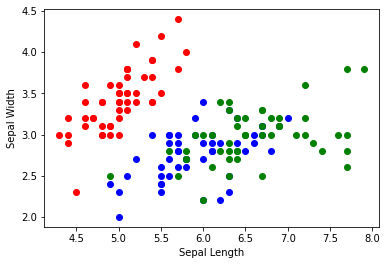

In [53]:
#Setosa, Versicolour, and Virginica
#Sepal Length, Sepal Width, Petal Length and Petal Width
%matplotlib inline
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(X_array[0:50, 0], X_array[0:50, 1], color='red') #for Setosa
plt.scatter(X_array[50:100, 0], X_array[50:100, 1], color='blue') #for Versicolour
plt.scatter(X_array[100:150, 0], X_array[100:150, 1], color='green') #for Virginica

In [54]:
from numpy.ma.core import zeros
X=zeros(X_array.shape)

from sklearn.preprocessing import MinMaxScaler

for i in range(0,4):
  X[:, i]=np.reshape(MinMaxScaler().fit_transform(np.reshape(X_array[:,i],(-1,1))), -1, order='F')

In [59]:
from sklearn.cluster import KMeans

sse=[]
k_rng=range(1,10)
for k in k_rng:
  km_rng=KMeans(n_clusters=k)
  km_rng.fit(X)
  sse.append(km_rng.inertia_)

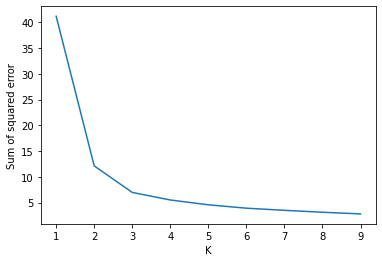

In [60]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Elbow at 3 as expected bcoz there are 3 flowers

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
km=KMeans(n_clusters=3)
km.fit(X_train)

KMeans(n_clusters=3)

In [57]:
y_pred=km.predict(X_test)

In [67]:
center=km.cluster_centers_
display(center)

array([[0.44621749, 0.30407801, 0.58023801, 0.54698582],
       [0.7265625 , 0.44921875, 0.80084746, 0.81901042],
       [0.20189702, 0.59146341, 0.07937164, 0.06199187]])

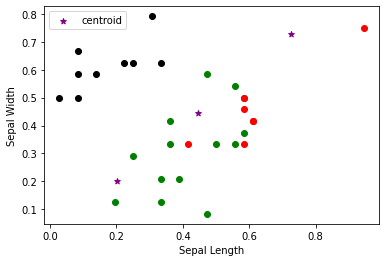

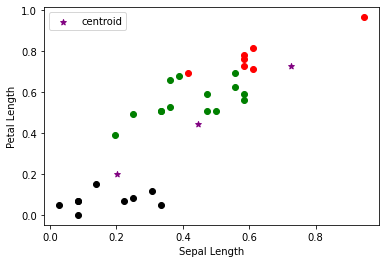

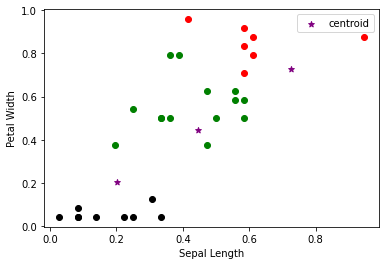

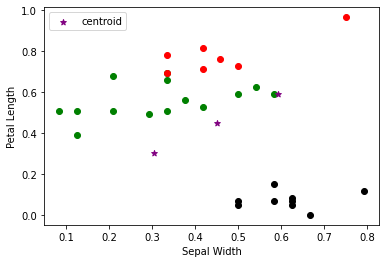

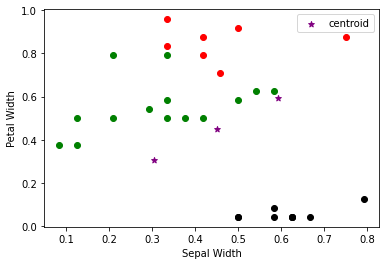

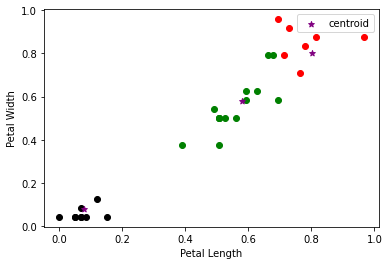

In [70]:
array_1 = X_test[y_pred==0]
array_2 = X_test[y_pred==1]
array_3 = X_test[y_pred==2]

Dict={0:'Sepal Length', 1:'Sepal Width', 2:'Petal Length', 3:'Petal Width'}

for p in range(0,4):
  for q in range(p+1,4):
    plt.xlabel(Dict[p])
    plt.ylabel(Dict[q])
    plt.scatter(array_1[:,p], array_1[:,q],color='green')
    plt.scatter(array_2[:,p], array_2[:,q],color='red')
    plt.scatter(array_3[:,p], array_3[:,q],color='black')
    plt.scatter(center[:,p], center[:,p], color='purple', marker='*', label='centroid')
    plt.legend()
    plt.show()